In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy.linalg import cholesky

images, labels = load_digits(2,return_X_y=True)
#training set
training_images=images[:300]
training_labels=labels[:300]
#test set
test_images=images[300:]
test_labels=labels[300:]

# k-NN Classification Using 2-D Features

In [6]:
class my_pca:
    def __init__(self,arr,n=0):
        mean_arr=np.mean(arr,axis=0)
        center_arr=mean_arr-arr
        u,s,v=np.linalg.svd(center_arr)
        self.u=u
        self.s=s
        
        if(n==0):
            self.n=self.getk(center_arr)
            #print(self.n)
        else:
            self.n=n
        
        max_abs_cols = np.argmax(np.abs(u), axis=0)
        signs = np.sign(u[max_abs_cols, range(u.shape[1])])
        u *= signs
        #v *= signs[:, np.newaxis]
        self.u=u
        principal_arr=u[:,:self.n]
        principal_arr*=s[:self.n]
        self.prin=principal_arr.copy()
    
    def apply(self,arr,n):
        
        
    def getk(self,arr):
        cum_sum=0
        data_energy=np.linalg.norm(arr)**2
        for i in range(len(self.s)):
            cum_sum=cum_sum+self.s[i]**2
            if(cum_sum/data_energy>=0.95):
                return i+1
            

In [7]:
#use sklearn.decomposition.PCA
#from sklearn import decomposition
#pca=decomposition.PCA(n_components=2)
#pca.fit(training_images)
#rain_pcaTrans=pca.transform(training_images)
#pca.fit(test_images)
#test_pcaTrans=pca.transform(test_images)

In [8]:
#calculate the pca
train_pca2=my_pca(training_images,2)
test_pca2=my_pca(test_images,2)

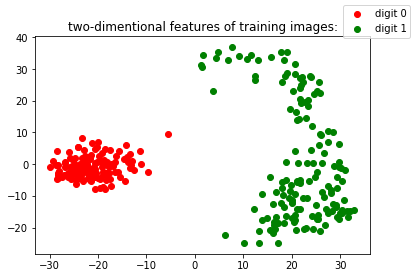

In [9]:
fig=plt.figure()
train_pca0=train_pca2.prin[training_labels==0]
train_pca1=train_pca2.prin[training_labels==1]

plt.scatter(train_pca0[:,0],train_pca0[:,1],c='r',label='digit 0')
plt.scatter(train_pca1[:,0],train_pca1[:,1],c='g',label='digit 1')
plt.title("two-dimentional features of training images:")
fig.legend()
plt.show()

In [10]:
#compare with using sklearn.neighbors.KNeighborsClassifier
#from sklearn.neighbors import KNeighborsClassifier
#neigh=KNeighborsClassifier(n_neighbors=5)
#neigh.fit(train_pcaTrans,training_labels)
#pca.fit(test_images)
#test_pcaTrans=pca.transform(test_images)
#predit_labels=neigh.predict(test_pcaTrans)
#b=np.bitwise_xor(predit_labels,test_labels)
#a=test_images[b==1]

In [11]:
class my_KNN():
    def __init__(self,point):
        norm=np.zeros((300,2))
        norm_list=[]
        for i in range(0,300):
            item=[np.linalg.norm(point-train_pca2.prin[i]),training_labels[i]]
            norm[i]=item
        sort_data=norm[norm[:,0].argsort()]
        self.sort_data=sort_data
        sign0=0
        sign1=0
        self.label=1
        for i in range(5):
            if(sort_data[i,1]==1):
                sign1+=1
            else:
                sign0+=1
        if(sign0>sign1):
            self.label=0

In [12]:
predict_labels=[]
for i in range(len(test_images)):
    item_label=my_KNN(test_pca2.prin[i])
    predict_labels.append(item_label.label)
predict_sign = predict_labels^test_labels
#print(predict_labels)

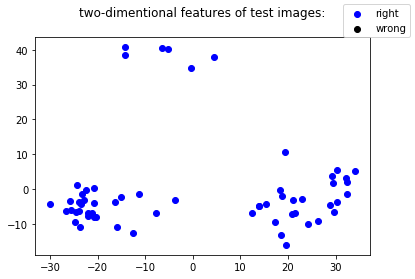

In [13]:
fig=plt.figure()
right_predicted=test_pca2.prin[predict_sign==0]
wrong_predicted=test_pca2.prin[predict_sign==1]
plt.scatter(right_predicted[:,0],right_predicted[:,1],c='b',label='right')
plt.scatter(wrong_predicted[:,0],wrong_predicted[:,1],c='black',label='wrong')
plt.title("two-dimentional features of test images:\n")
fig.legend()
plt.show()

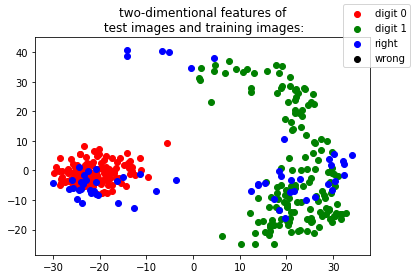

In [14]:
fig=plt.figure()

right_predicted=test_pca2.prin[predict_sign==0]
wrong_predicted=test_pca2.prin[predict_sign==1]

plt.title("two-dimentional features of\n test images and training images:")
plt.scatter(train_pca0[:,0],train_pca0[:,1],c='r',label='digit 0')
plt.scatter(train_pca1[:,0],train_pca1[:,1],c='g',label='digit 1')
plt.scatter(right_predicted[:,0],right_predicted[:,1],c='b',label='right')
plt.scatter(wrong_predicted[:,0],wrong_predicted[:,1],c='black',label='wrong')
fig.legend()
plt.show()

In [15]:
error=sum(predict_sign)/60
print ("average classification error:",error)

average classification error: 0.0


# k-NN Classification Using Higher-dimensional Features

In [16]:
train_pcaR=my_pca(training_images)
test_pcaR=my_pca(test_images,train_pcaR.n)

In [17]:
class my_KNN2():
    def __init__(self,data,k,new=0):
        predict_labels=[]
        if(new):
            train_data=new_pca(training_images,19)
        else:
            train_data=my_pca(training_images,19)
        for i in range(len(test_images)):
            item_label=self.getLabel(train_data,data.prin[i],k)
            predict_labels.append(self.label)
        self.predict_sign = predict_labels^test_labels
        
    def getLabel(self,train_data,point,k):
        norm=np.zeros((300,2))
        norm_list=[]
        for i in range(0,300):
            item=[np.linalg.norm(point-train_data.prin[i]),training_labels[i]]
            norm[i]=item
        sort_data=norm[norm[:,0].argsort()]
        self.sort_data=sort_data
        sign0=0
        sign1=0
        self.label=1
        for i in range(k):
            if(sort_data[i,1]==1):
                sign1+=1
            else:
                sign0+=1
        if(sign0>sign1):
            self.label=0
    def getError(self):
        error=sum(self.predict_sign)/60
        return error

        

In [24]:
a=my_KNN2(test_pcaR,1)
b=my_KNN2(test_pcaR,3)
c=my_KNN2(test_pcaR,5)
d=my_KNN2(test_pcaR,7)
e=my_KNN2(test_pcaR,9)
arr_num=[1,3,5,7,9]
print("error of k=1:",a.getError())
print("error of k=3:",b.getError())
print("error of k=5:",c.getError())
print("error of k=7:",d.getError())
print("error of k=9:",e.getError())
arr_error=[a.getError(),b.getError(),c.getError(),d.getError(),e.getError()]

error of k=1: 0.0
error of k=3: 0.0
error of k=5: 0.0
error of k=7: 0.0
error of k=9: 0.0


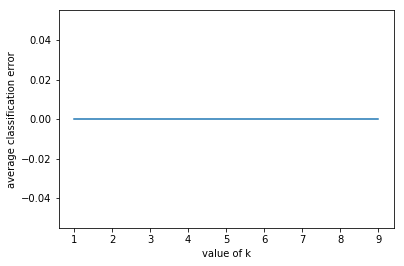

In [20]:
fig=plt.figure()
plt.plot(arr_num,arr_error)
plt.xlabel("value of k")
plt.ylabel("average classification error")
plt.show()

As you can see, from 1 to 9 the average error would always be 0. So in this case we can choose k = 1 to reduce the time of calculation.

# further improvment

I analysis my pca and compare it to the sklearn.decomposition.PCA. 

I found that I fortgot to multiply the singular value to the singular vectors to get the transform data When I do the pca. 

$XV=UΣ$ is the key to transform.

What's more, I do this to ensure the sign of singular values and singular vectors wolud no change in different case.

```python
max_abs_cols = np.argmax(np.abs(u), axis=0)
signs = np.sign(u[max_abs_cols, range(u.shape[1])])
u *= signs
```

So I add  u[:n]*=s[:n] to my pca function to transform the data. It can make sure I can get the right transform data.

Eventually, I get a better result. I get no error of all the k.

In [23]:
"""class new_pca:
    def __init__(self,arr,n=0):
        mean_arr=np.mean(arr,axis=0)
        center_arr=mean_arr-arr
        u,s,v=np.linalg.svd(center_arr)
        self.u=u
        self.s=s
        
        if(n==0):
            self.n=self.getk(center_arr)
            #print(self.n)
        else:
            self.n=n
        
        max_abs_cols = np.argmax(np.abs(u), axis=0)
        signs = np.sign(u[max_abs_cols, range(u.shape[1])])
        u *= signs
        #v *= signs[:, np.newaxis]

        principal_arr=u[:,:self.n]
        
        #!!!!!key of the new pca
        principal_arr*=s[:self.n]
        
        self.prin=principal_arr.copy()
    def getk(self,arr):
        cum_sum=0
        data_energy=np.linalg.norm(arr)**2
        for i in range(len(self.s)):
            cum_sum=cum_sum+self.s[i]**2
            if(cum_sum/data_energy>=0.95):
                return i+1
            
new_train_pcaR=new_pca(training_images)
new_test_pcaR=new_pca(test_images,train_pcaR.n)
a=my_KNN2(new_test_pcaR,1,new=1)
b=my_KNN2(new_test_pcaR,3,new=1)
c=my_KNN2(new_test_pcaR,5,new=1)
d=my_KNN2(new_test_pcaR,7,new=1)
e=my_KNN2(new_test_pcaR,9,new=1)
arr_num=[1,3,5,7,9]
arr_error=[a.getError(),b.getError(),c.getError(),d.getError(),e.getError()]
fig=plt.figure()
plt.plot(arr_num,arr_error)
plt.xlabel("value of k")
plt.ylabel("average classification error")
plt.title("reslut of the new pca")
plt.show()"""
a=1